# Simulations [TEST]

Scott Cohn

Apr 2020

Stat 535

In [127]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

sys.path.insert(0, 'stat535/lib/')

from Game import *

## Functions

In [120]:
def strat_distribution(g):
    """
    Plot strategy distributiom
    """
    strat_distro = {"coop" : 0, "defect" : 0, "random" : 0} # [coop, defect, random]

    for i in range(numAgents):
        if (g.players[i].strat == "coop"):
            strat_distro["coop"] += 1
        elif (g.players[i].strat == "defect"):
            strat_distro["defect"] += 1
        else:
            strat_distro["random"] += 1

    print(f"Cooperate: {strat_distro.get('coop')} Defect: {strat_distro.get('defect')} Random: {strat_distro.get('random')}")
    
    x = strat_distro.keys()
    y = strat_distro.values()

    return(plt.bar(x, y))

In [164]:
def game_df(g):
    id = []
    strat = []
    assets = []

    for i in range(numAgents):
        id.append(g.players[i].id)
        strat.append(g.players[i].strat)
        assets.append(g.players[i].asset)
    
    df = pd.DataFrame({"id" : id, "strategies" : strat, "assets" : assets})
    
    return(df)

In [186]:
def sim(g, N):
    """
    N is num sims
    g is game
    """
    for _ in range(N):
        g = g.succ()
    
    return(g)

## Initial Conditions

In [77]:
numAgents = 100
testGini = [0, 0.2, 0.5, 0.8, 1]
mu = 2

### Game Instance - Test 1

- Agents = 100
- Gini = 0.2
- mu = 2

In [181]:
g = Game(numAgent = numAgents, Gini = testGini[1], para = mu)

### Simulations - Test 1

Cooperate: 29 Defect: 30 Random: 41


<BarContainer object of 3 artists>

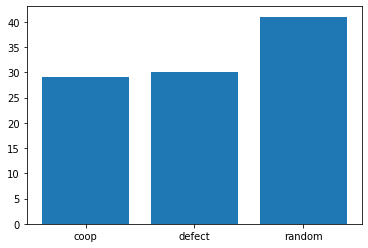

In [182]:
strat_distribution(g)

In [187]:
g.gini()

0.22776760897566267

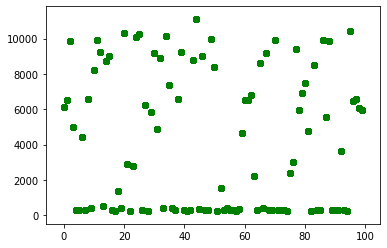

In [185]:
# wealth distr init

y = g_init.wealth_distr()

for _ in y:
    plt.scatter(range(len(y)), y, c = 'g')

In [189]:
g_fin = sim(g, 100)

In [190]:
g_fin.gini()

0.5996232192203305

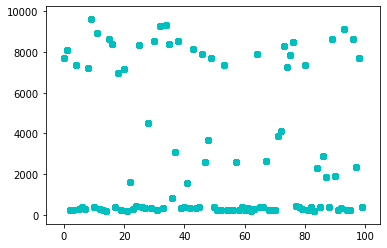

In [191]:
# wealth distr fin

y2 = g_fin.wealth_distr()

for _ in y2:
    plt.scatter(range(len(y2)), y2, c = 'c')

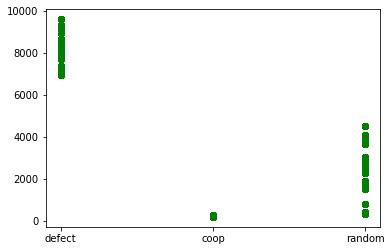

In [192]:
df = game_df(g_fin)

groups = df.groupby("id")
for strategies, assets in groups:
    plt.plot(df["strategies"], df["assets"], marker="o", color = 'g', linestyle="", label=id)